<a href="https://colab.research.google.com/github/Divya-Moorthy/LancerHacks23/blob/main/Lancer_Hacks_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
from sklearn import metrics
import os             
import numpy as np   
import pandas as pd  
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import requests

#imports to make reading and processing it all easier

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

# using cancer.csv file from a google api (summer internship , KhanLabs), idea has been re-created and developed more fom my summer project (I orginally had help from a mentor, just wanted to put a disclaimer, however I created this today purely from memory)
profiles = pd.read_csv('cancer.csv')
profiles['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
profiles.to_csv('cancer_data.csv')
del profiles

cancer.csv.7        100%[===================>] 122.27K  --.-KB/s    in 0.001s  


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


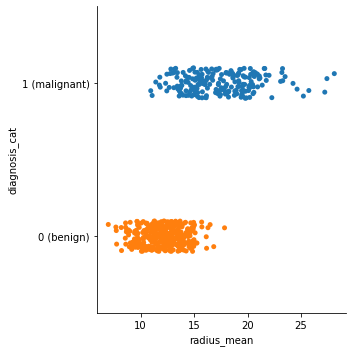

In [59]:
data_path  = 'cancer_data.csv'

# using panda import (pd to read datat), then storing it in a variable called 'dataframe'
profiletable = pd.read_csv(data_path)

#cookie db?????
#might use to store diagnosis's

profiletable = profiletable[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
profiletable['diagnosis_cat'] = profiletable['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

#print catplot


sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = profiletable, order=['1 (malignant)', '0 (benign)'])
profiletable.head()

How is this relevant to cancer cells?

Basically....

A lower mean radius can be interpreted as a bengign (harmless) tumour because of the nature of cancer. Cancerous cells clump together and grow over time, so due to the nature of it, the larger tumours can be interpreted as malignant, or harmful. 

Using a Logistic Regression to diagnose:


In [79]:
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

regression_model = linear_model.LogisticRegression()
#does the line fitting for me 


#Creating a Single varibale logistic Regression
X = ['radius_mean'] # using radius to find diagnosis
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head()) #training my data set
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head()) #traning my data set

X_test = test_df[X] #running tests on test dataframes
y_test = test_df[y]

regression_model = linear_model.LogisticRegression() #using linear model to calculate the regression for me
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test) #running the prediction 

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64
0.868421052631579


Diagnosis of 1 is malignant and 0 is bengin 

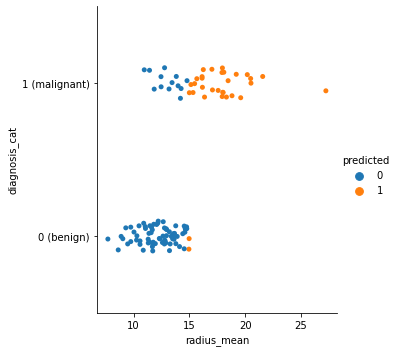

In [61]:
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [78]:
multi_X = ['perimeter_mean']
y = 'diagnosis'
#Now I'm running a multi-variable Logistic regression using all of the factors 

#split data 
multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

#prep training vars
multi_X_train, multi_X_test = multi_train_df[multi_X], multi_test_df[multi_X]
y_train, y_test = multi_train_df[y], multi_test_df[y]

#make model
model = linear_model.LogisticRegression()

#fit model to data (using model.fit())
model.fit(multi_X_train, y_train)

# Use model, after training to predict
multi_preds = model.predict(multi_X_test)

# Find accuracy and print
accuracy = accuracy_score(y_test, multi_preds)
print(multi_X)
print(accuracy)
print(multi_preds)

NameError: ignored

In [77]:
multi_X = ['perimeter_mean', 'radius_mean', 'texture_mean','area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']
y = 'diagnosis'
#Now I'm running a multi-variable Logistic regression using all of the factors 

#split data 
multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

#prep training vars
multi_X_train, multi_X_test = multi_train_df[multi_X], multi_test_df[multi_X]
y_train, y_test = multi_train_df[y], multi_test_df[y]

#make model
model = linear_model.LogisticRegression()

#fit model to data (using model.fit())
model.fit(multi_X_train, y_train)

# Use model, after training to predict
multi_preds = model.predict(multi_X_test)

# Find accuracy and print
accuracy = accuracy_score(y_test, multi_preds)
print(multi_X)
print(accuracy)
print(multi_preds)

diagnosesList = multi_preds

['perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']
0.8771929824561403
[1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
class CookieDB:
  def __init__(self, token, url="https://cookiedb.com/api/db"):
    self.token = token
    self.url = url

  def create_table(self, name, schema={}):
    """
    Usage Example:

    ck.create_table("users", {
      "name": "string",
      "description": "nullable string",
      "age": "number"
    })
    """
    r = requests.post(
      url=f"{self.url}/create/{name}",
      headers={"Authorization": f"Bearer {self.token}"},
      json=schema,
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

  def edit_table(self, name, options={}):
    """
    Usage Example:

    ck.edit_table("users", {
      "name": "old_users",
      "schema": {
        "name": "string"
      },
      "alias": {
        "name": "$name"
      }
    })
    """
    r = requests.post(
      url=f"{self.url}/edit/{name}",
      headers={"Authorization": f"Bearer {self.token}"},
      json=options,
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

  def drop_table(self, name):
    """
    Usage Example:

    ck.drop_table("users")
    """
    r = requests.post(
      url=f"{self.url}/drop/{name}",
      headers={"Authorization": f"Bearer {self.token}"},
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

  def meta_table(self, name):
    """
    Usage Example:

    print(ck.meta_table("users"))
    """
    r = requests.post(
      url=f"{self.url}/meta/{name}",
      headers={"Authorization": f"Bearer {self.token}"},
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

    return data

  def meta(self):
    """
    Usage Example:

    print(ck.meta())
    """
    r = requests.post(
      url=f"{self.url}/meta", headers={"Authorization": f"Bearer {self.token}"}
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

    return data

  def insert(self, name, document):
    """
    Usage Example:

    ck.insert('users', {
      "name": "cookie_fan",
      "description": None,
      "age": 20
    })
    """
    r = requests.post(
      url=f"{self.url}/insert/{name}",
      headers={"Authorization": f"Bearer {self.token}"},
      json=document,
    )

    data = r.text

    return data

  def get(self, name, key):
    """
    Usage Example:

    print(ck.get("users", "b94a8779-f737-466b-ac40-4dfb130f0eee"))
    """
    r = requests.post(
      url=f"{self.url}/get/{name}/{key}",
      headers={"Authorization": f"Bearer {self.token}"},
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

    return data

  def delete(self, name, key):
    """
    Usage Example:

    ck.delete("users", "b94a8779-f737-466b-ac40-4dfb130f0eee")
    """
    r = requests.post(
      url=f"{self.url}/delete/{name}/{key}",
      headers={"Authorization": f"Bearer {self.token}"},
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

  def delete_by_query(self, name, where):
    """
    Usage Example:

    ck.delete_by_query("users", "starts_with($name, 'cookie')")
    """
    r = requests.post(
      url=f"{self.url}/delete/{name}",
      headers={"Authorization": f"Bearer {self.token}"},
      json={"where": where},
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

  def update(self, name, key, document):
    """
    Usage Example:

    ck.update("users", "starts_with($name, 'cookie')")
    """
    r = requests.post(
      url=f"{self.url}/update/{name}/{key}",
      headers={"Authorization": f"Bearer {self.token}"},
      json=document,
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

    return data

  def select(self, name, where="", options={}):
    """
    Usage Example:

    print(ck.select("users", "starts_with($name, 'cookie')"))
    """
    r = requests.post(
      url=f"{self.url}/select/{name}",
      headers={"Authorization": f"Bearer {self.token}"},
      json={
        "where": where,
        "max_results": options["max_results"]
        if "max_results" in options
        else -1,
        "expand_keys": options["expand_keys"]
        if "expand_keys" in options
        else False,
        "order": options["order"] if "order" in options else None,
      },
    )
    data = r.json()

    if "error" in data:
      raise Exception(data["error"])

    return data


In [104]:
# CookieDB.create_table("estimates", {
#   numFactors: "int",
#   accuracy: "int",
# })



diagnoses = [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
 1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 , 0, 1,
 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
 0, 0, 0]


ck = CookieDB('YEvfNCxKLFL5+uRWODRxsWi2TxoodYry', 'https://cookiedb.com/api/db');
ck.create_table("estimates", {
      "factors": "number",
      "accuracy": "number"
    })

"""
ck.insert('estimates', {
      "factors": 4,
      "accuracy": 0.8771929824561403
    })

ck.insert('estimates', {
      "factors": 1,
      "accuracy": 0.868421052631579
    })
"""

ck.create_table("ActualDiagnoses", {
      "patient": "string",
      "diagnoses": "number"
    })


print(ck.select("diagnosis"))

for i in range(len(diagnoses)):
  ck.insert('ActualDiagnoses', {
      "patient" : "patient number " + str(i),
      "diagnoses": diagnoses[i]
  
  })




[{'patient': 'test', 'diagnoses': 0, 'key': '02cd4b78-a8bf-4b5f-8548-01c9ae2a24f9'}]
